# DataEthics4All Hackathon

#### Daria Aza

### Statistical analysis of pre-trial incarceration & bail bond practices in Connecticut

In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The dataset for this analysis is the State of Connecticut's ["Accused Pre-Trial Inmates in Correctional Facilities"](https://data.ct.gov/Public-Safety/Accused-Pre-Trial-Inmates-in-Correctional-Faciliti/b674-jy6w). According to the website, this dataset is "a listing, updated nightly, of individuals being held in Department of Correction facilities while awaiting trial, [on] each day beginning July 1, 2016."

In [453]:
# Read in data
data = pd.read_csv('accused_data.csv')

data.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,07/19/2016,ZZSESWRJ,04/20/2016,BLACK,M,16,200000,CRIMINAL ATTEMPT,MANSON YI,NONE
1,07/19/2016,ZZSEWCJC,07/07/2016,HISPANIC,M,18,500000,STEALING A FIREARM DF,MANSON YI,NONE
2,07/19/2016,ZZRCCBBJ,07/06/2016,HISPANIC,M,48,101000,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,NONE
3,07/19/2016,ZZRBBBJC,03/27/2015,BLACK,M,34,1000800,MURDER AF,GARNER,NONE
4,07/19/2016,ZZSZRRRL,04/18/2016,HISPANIC,M,22,95000,THREATENING AM,WALKER RC,NONE


### Data Cleaning

In [454]:
data.columns = ['date', 'identifier', 'admission_date', 'race', 'gender', 'age', 'bond_amount', 'offense', 'facility', 'detainer']

In [455]:
data

,date,identifier,admission_date,race,gender,age,bond_amount,offense,facility,detainer
0,07/19/2016,ZZSESWRJ,04/20/2016,BLACK,M,16,200000,CRIMINAL ATTEMPT,MANSON YI,NONE
1,07/19/2016,ZZSEWCJC,07/07/2016,HISPANIC,M,18,500000,STEALING A FIREARM DF,MANSON YI,NONE
2,07/19/2016,ZZRCCBBJ,07/06/2016,HISPANIC,M,48,101000,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,NONE
3,07/19/2016,ZZRBBBJC,03/27/2015,BLACK,M,34,1000800,MURDER AF,GARNER,NONE
4,07/19/2016,ZZSZRRRL,04/18/2016,HISPANIC,M,22,95000,THREATENING AM,WALKER RC,NONE
...,...,...,...,...,...,...,...,...,...,...
4774775,09/20/2020,ZZHBLZCJ,09/14/2020,BLACK,M,27,150800,CRIMINAL POSS OF PISTOL/REVOLVER DF,CORRIGAN CI,NONE
4774776,09/20/2020,ZZHHZEJW,07/24/2020,HISPANIC,F,32,62500,ASSAULT ON POLICE OR FIRE OFFICER CF,YORK CI,STATE OF CT
4774777,09/20/2020,ZZZBLHLR,06/22/2020,BLACK,M,58,50000,"BURGLARY, THIRD DEGREE DF",BRIDGEPORT CC,NONE
4774778,09/20/2020,ZZSHSBRL,06/25/2020,WHITE,F,39,110000,IDENTITY THEFT 3RD DEGREE DF,YORK CI,NONE


In [456]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4774780 entries, 0 to 4774779
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   date            object
 1   identifier      object
 2   admission_date  object
 3   race            object
 4   gender          object
 5   age             int64 
 6   bond_amount     int64 
 7   offense         object
 8   facility        object
 9   detainer        object
dtypes: int64(2), object(8)
memory usage: 364.3+ MB


As we can see, we have over 4.77 million rows and 10 features describing our dataset:
- ```date```: describes the date the data point was downloaded
- ```identifier```: ID of the inmate
- ```admission_date```: the date of the admission of the person
- ```race```: person's racial background
- ```gender```: gender of the inmate
- ```age```: describes the age
- ```bond_amount```: size of the bond 
- ```offense```: type of the offense commited
- ```facility```: facility where the offender was detained
- ```detainer```: detainer name

The date column is saved as a string right now, so we will convert it to datetime object.

In [457]:
# Convert date columns to datetime
data['date'] = pd.to_datetime(data['date'])
data['admission_date'] = pd.to_datetime(data['admission_date'])

In [458]:
# checking that our code worked, as we can see below, the date columns are saved as a datetime object now

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4774780 entries, 0 to 4774779
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   identifier      object        
 2   admission_date  datetime64[ns]
 3   race            object        
 4   gender          object        
 5   age             int64         
 6   bond_amount     int64         
 7   offense         object        
 8   facility        object        
 9   detainer        object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 364.3+ MB


In [459]:
# Check for null values
data.isna().sum()

date              0
identifier        0
admission_date    0
race              0
gender            0
age               0
bond_amount       0
offense           0
facility          0
detainer          0
dtype: int64

In [460]:
# Check for duplicate rows
data.duplicated().sum()

6292

In [461]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

Some of the identifiers do not start with 'ZZ', there are 8 entries, but in fact 4 of them are duplicated. We are going to add 'ZZ' to the first 4 rows to make the formatting aligned with the rest of the dataset. We are going to simply drop these rows because of the time constrains.

In [462]:
data.drop(data[~data['identifier'].str.startswith('ZZ')].index, inplace=True)

In [463]:
# Various text cleaning transformations
data['race'] = data['race'].str.title()
data['race'].replace('Amer Ind', 'Indigenous', inplace=True)
data['race'].replace('Hispanic', 'Latinx', inplace=True)
data['offense'] = data['offense'].str.replace(',', '')

In [464]:
# Dropping the Detainer column, because irrelevant to our purposes
data.drop('detainer', axis=1, inplace=True)

In [465]:
# Preview cleaned data
data.head()

,date,identifier,admission_date,race,gender,age,bond_amount,offense,facility
0,2016-07-19,ZZSESWRJ,2016-04-20,Black,M,16,200000,CRIMINAL ATTEMPT,MANSON YI
1,2016-07-19,ZZSEWCJC,2016-07-07,Latinx,M,18,500000,STEALING A FIREARM DF,MANSON YI
2,2016-07-19,ZZRCCBBJ,2016-07-06,Latinx,M,48,101000,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI
3,2016-07-19,ZZRBBBJC,2015-03-27,Black,M,34,1000800,MURDER AF,GARNER
4,2016-07-19,ZZSZRRRL,2016-04-18,Latinx,M,22,95000,THREATENING AM,WALKER RC


### Data Transformation and EDA

In [466]:
# We'll create a copy of the dataframe to preserve original data

df = data.copy()

In [467]:
len(df['date'].unique())

1467

In [468]:
len(df['identifier'].unique())

40470

In [469]:
df['age'].unique()

array([16, 18, 48, 34, 22, 31, 20, 46, 33, 51, 47, 32, 49, 26, 28, 36, 39,
       19, 23, 37, 38, 29, 30, 25, 50, 21, 35, 59, 53, 58, 55, 27, 52, 43,
       65, 42, 54, 45, 24, 73, 60, 41, 44, 40, 56, 61, 62, 57, 68, 17, 69,
       70, 67, 64, 63, 79, 15, 66, 78, 72, 75, 76, 80, 71, 74, 81, 77, 84,
       86, 85])

In [470]:
data = df.drop(columns='date').drop_duplicates(keep='first').join(df['date'], on=df.drop(columns='date').drop_duplicates(keep='first').index)

In [471]:
data

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date
0,ZZSESWRJ,2016-04-20,Black,M,16,200000,CRIMINAL ATTEMPT,MANSON YI,2016-07-19
1,ZZSEWCJC,2016-07-07,Latinx,M,18,500000,STEALING A FIREARM DF,MANSON YI,2016-07-19
2,ZZRCCBBJ,2016-07-06,Latinx,M,48,101000,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,2016-07-19
3,ZZRBBBJC,2015-03-27,Black,M,34,1000800,MURDER AF,GARNER,2016-07-19
4,ZZSZRRRL,2016-04-18,Latinx,M,22,95000,THREATENING AM,WALKER RC,2016-07-19
...,...,...,...,...,...,...,...,...,...
4772763,ZZSRZJBH,2019-11-20,Black,M,24,290000,SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE F,NEW HAVEN CC,2020-09-20
4773655,ZZSHHESW,2019-11-22,Black,M,26,500000,ASSAULT FIRST DEGREE BF,BRIDGEPORT CC,2020-09-20
4774025,ZZHBSBCL,2015-09-24,White,M,26,1500000,MURDER AF,GARNER,2020-09-20
4774037,ZZHHCRSW,2020-09-01,Black,M,31,100000,THREATENING 1ST DEGREE DF,HARTFORD CC,2020-09-20


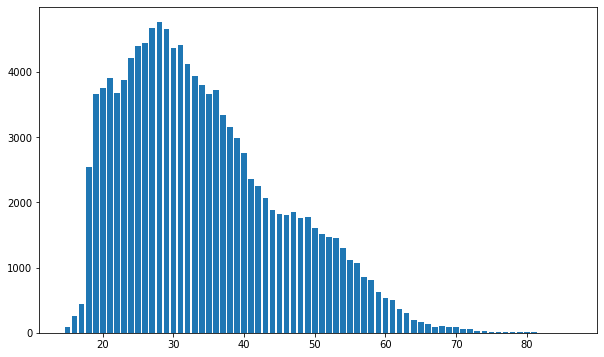

In [472]:
plt.figure(figsize = (10,6))
plt.bar(data['age'].value_counts().index, data['age'].value_counts().values)
plt.show()

In [473]:
df.to_csv('hack.csv', index = False)

In [474]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [475]:
df['race'].unique()

array(['Black', 'Latinx', 'White', 'Asian', 'Indigenous'], dtype=object)

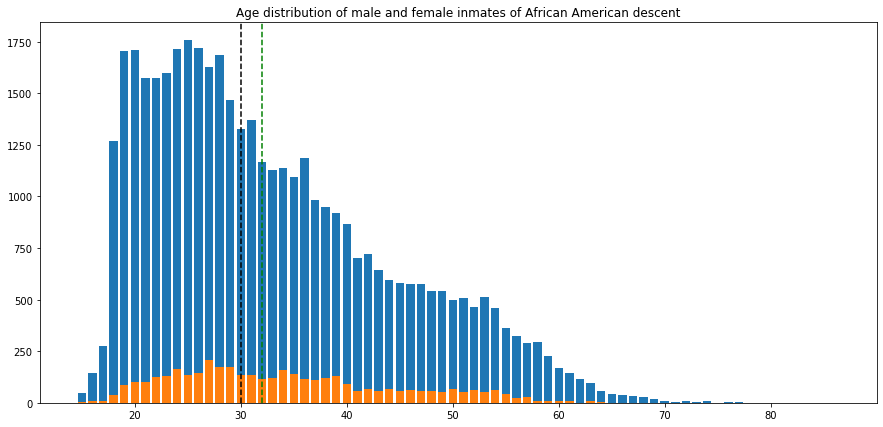

In [476]:
plt.figure(figsize=(15,7))
plt.bar(data.loc[(data['race']=='Black') & (data['gender']== 'M')]['age'].value_counts().index, data.loc[(data['race']=='Black') & (data['gender']== 'M')]['age'].value_counts().values)
plt.axvline(data.loc[(data['race']=='Black') & (data['gender']== 'M')]['age'].median(), color='black', linestyle='--')
plt.bar(data.loc[(data['race']=='Black') & (data['gender']== 'F')]['age'].value_counts().index, data.loc[(data['race']=='Black') & (data['gender']== 'F')]['age'].value_counts().values)
plt.axvline(data.loc[(data['race']=='Black') & (data['gender']== 'F')]['age'].median(), color='g', linestyle='--')
plt.title('Age distribution of male and female inmates of African American descent')
plt.show()


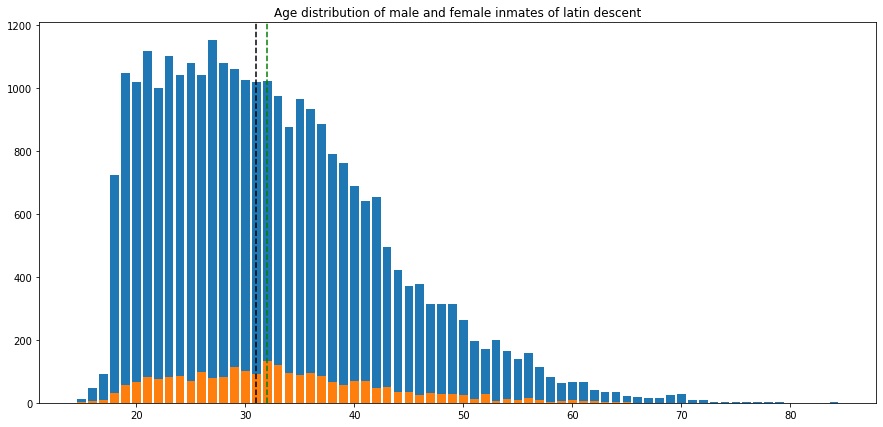

In [477]:
plt.figure(figsize=(15,7))
plt.bar(data.loc[(data['race']=='Latinx') & (data['gender']== 'M')]['age'].value_counts().index, data.loc[(data['race']=='Latinx') & (data['gender']== 'M')]['age'].value_counts().values)
plt.axvline(data.loc[(data['race']=='Latinx') & (data['gender']== 'M')]['age'].median(), color='black', linestyle='--')
plt.bar(data.loc[(data['race']=='Latinx') & (data['gender']== 'F')]['age'].value_counts().index, data.loc[(data['race']=='Latinx') & (data['gender']== 'F')]['age'].value_counts().values)
plt.axvline(data.loc[(data['race']=='Latinx') & (data['gender']== 'F')]['age'].median(), color='g', linestyle='--')
plt.title('Age distribution of male and female inmates of latin descent')
plt.show()

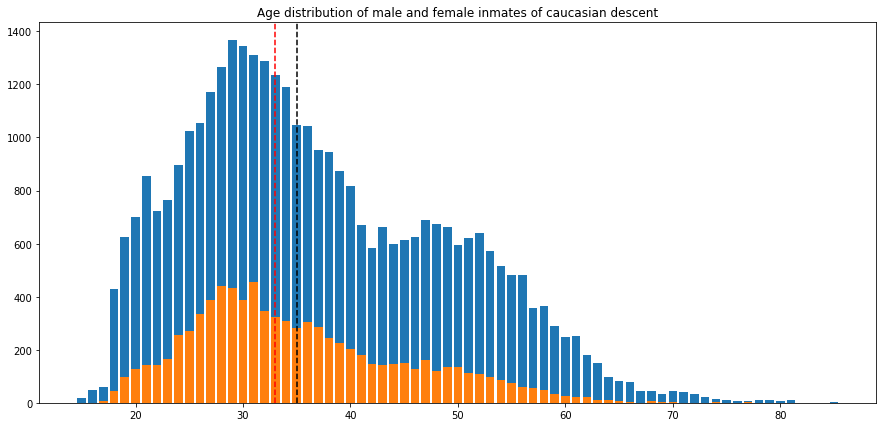

In [478]:
plt.figure(figsize=(15,7))
plt.bar(data.loc[(data['race']=='White') & (data['gender']== 'M')]['age'].value_counts().index, data.loc[(data['race']=='White') & (data['gender']== 'M')]['age'].value_counts().values)
plt.axvline(data.loc[(data['race']=='White') & (data['gender']== 'M')]['age'].median(), color='black', linestyle='--')
plt.bar(data.loc[(data['race']=='White') & (data['gender']== 'F')]['age'].value_counts().index, data.loc[(data['race']=='White') & (data['gender']== 'F')]['age'].value_counts().values)
plt.axvline(data.loc[(data['race']=='White') & (data['gender']== 'F')]['age'].median(), color = 'r', linestyle = '--')
plt.title('Age distribution of male and female inmates of caucasian descent')
plt.show()

In [479]:
data

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date
0,ZZSESWRJ,2016-04-20,Black,M,16,200000,CRIMINAL ATTEMPT,MANSON YI,2016-07-19
1,ZZSEWCJC,2016-07-07,Latinx,M,18,500000,STEALING A FIREARM DF,MANSON YI,2016-07-19
2,ZZRCCBBJ,2016-07-06,Latinx,M,48,101000,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,2016-07-19
3,ZZRBBBJC,2015-03-27,Black,M,34,1000800,MURDER AF,GARNER,2016-07-19
4,ZZSZRRRL,2016-04-18,Latinx,M,22,95000,THREATENING AM,WALKER RC,2016-07-19
...,...,...,...,...,...,...,...,...,...
4772763,ZZSRZJBH,2019-11-20,Black,M,24,290000,SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE F,NEW HAVEN CC,2020-09-20
4773655,ZZSHHESW,2019-11-22,Black,M,26,500000,ASSAULT FIRST DEGREE BF,BRIDGEPORT CC,2020-09-20
4774025,ZZHBSBCL,2015-09-24,White,M,26,1500000,MURDER AF,GARNER,2020-09-20
4774037,ZZHHCRSW,2020-09-01,Black,M,31,100000,THREATENING 1ST DEGREE DF,HARTFORD CC,2020-09-20


In [480]:
print(f'Bond amount for White inmales: ',data.loc[data['race']=='White']['bond_amount'].median())
print(f'Bond amount for  inmates of color: ',data.loc[data['race']!='White']['bond_amount'].median())

Bond amount for White inmales:  30000.0
Bond amount for  inmates of color:  50500.0


In [481]:
print(f'Bond amount for Black males:', data.loc[(data['gender']=='M') & (data['race']=='Black')]['bond_amount'].median())
print(f'Bond amount for White males: ',data.loc[(data['gender']=='M') & (data['race']=='White')]['bond_amount'].median())
print(f'Bond amount for Latin males: ',data.loc[(data['gender']=='M') & (data['race']=='Latinx')]['bond_amount'].median())

Bond amount for Black males: 60050.0
Bond amount for White males:  35000.0
Bond amount for Latin males:  51000.0


In [482]:
print(f'Bond amount for Black females:', data.loc[(data['gender']=='F') & (data['race']=='Black')]['bond_amount'].median())
print(f'Bond amount for White females: ',data.loc[(data['gender']=='F') & (data['race']=='White')]['bond_amount'].median())
print(f'Bond amount for Latin females: ',data.loc[(data['gender']=='F') & (data['race']=='Latinx')]['bond_amount'].median())

Bond amount for Black females: 25000.0
Bond amount for White females:  20000.0
Bond amount for Latin females:  25000.0


In [483]:
data['offense'].unique()

array(['CRIMINAL ATTEMPT', 'STEALING A FIREARM                    DF',
       'SALE OF NARC/AMPHET BY NON-DEPENDENT   F',
       'MURDER                                AF',
       'THREATENING                           AM',
       'FAILURE TO APPEAR SECOND DEGREE      AM',
       'ASSAULT FIRST DEGREE                 BF',
       'LARCENY SECOND DEGREE                CF',
       'HOME INVASION                         AF',
       'ASSAULT 1ST VICTIM 60 OR OVER        BF',
       'POSSESSION OF NARCOTICS', 'VIOLATION OF PROBATION OR COND DISCHG',
       'SEXUAL ASSAULT FIRST DEGREE           F',
       'CRIMINAL POSSESSION OF A PISTOL       DF',
       'SELLING WEAPONS TO ALIENS PROHIBITED   F',
       'INTERFERING WITH AN OFFICER           AM',
       'BURGLARY THIRD DEGREE                DF',
       'SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F',
       'ASSAULT SECOND DEGREE                DF',
       'LARCENY THIRD DEGREE                 DF',
       'REG PERSON WHO COMM OFF AGAINST MINOR 

In [484]:
data.loc[data['offense']=='ISSUING A BAD CHECK']

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date
41357,ZZSEWCER,2016-07-03,Black,M,28,100000,ISSUING A BAD CHECK,HARTFORD CC,2016-07-04
42688,ZZSEWCES,2016-07-03,Black,M,24,100000,ISSUING A BAD CHECK,HARTFORD CC,2016-07-04
182753,ZZECLWBC,2017-02-28,Black,M,53,5000,ISSUING A BAD CHECK,BRIDGEPORT CC,2017-03-01
426786,ZZSZCBLC,2016-12-15,Black,M,26,25000,ISSUING A BAD CHECK,BRIDGEPORT CC,2016-12-16
427263,ZZSZCBLC,2016-12-15,Black,M,26,2500,ISSUING A BAD CHECK,BRIDGEPORT CC,2016-12-17
858246,ZZSEJJRE,2017-03-29,White,F,32,50,ISSUING A BAD CHECK,YORK CI,2017-05-03
974642,ZZEBRBEW,2017-06-07,Latinx,M,52,10000,ISSUING A BAD CHECK,BRIDGEPORT CC,2017-06-08
3914332,ZZSEWWSJ,2019-11-22,White,F,35,15000,ISSUING A BAD CHECK,YORK CI,2019-11-23
3914715,ZZZJCHJW,2019-11-22,White,M,60,2500,ISSUING A BAD CHECK,HARTFORD CC,2019-11-23
3923617,ZZZJCHJW,2019-11-22,White,M,60,10000,ISSUING A BAD CHECK,HARTFORD CC,2019-11-26


In [485]:
data[data['offense'].str.lower().str.contains('felony')]

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date
126,ZZSZEHZB,2016-05-25,Black,M,24,2000000,FELONY MURDER AF,NORTHERN CI,2016-07-19
280,ZZHWBWSW,2013-10-21,Black,M,23,1501000,FELONY MURDER AF,NORTHERN CI,2016-07-19
358,ZZHLELHC,2014-01-13,Black,M,24,1010100,FELONY MURDER AF,NORTHERN CI,2016-07-19
379,ZZHCSLSR,2015-07-06,Black,M,23,2099000,FELONY MURDER AF,NORTHERN CI,2016-07-19
455,ZZSZJZRB,2015-05-07,Latinx,M,20,499000,FELONY MURDER AF,NORTHERN CI,2016-07-19
...,...,...,...,...,...,...,...,...,...
4671094,ZZSRRWLE,2020-01-06,Black,M,21,2000000,FELONY MURDER AF,WALKER RC,2020-08-14
4734599,ZZRHBESR,2019-12-20,Black,M,49,1000000,FELONY MURDER AF,WALKER RC,2020-09-06
4742116,ZZHHESBW,2018-03-19,Latinx,M,43,2002500,FELONY MURDER AF,BRIDGEPORT CC,2020-09-09
4745023,ZZRREZSB,2020-01-08,Latinx,M,45,2250000,FELONY MURDER AF,WALKER RC,2020-09-10


In [486]:
data[data['offense'].str.lower().str.contains('assault')]

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date
7,ZZSESRLL,2016-04-01,Black,M,18,275000,ASSAULT FIRST DEGREE BF,MANSON YI,2016-07-19
10,ZZRBHCHE,2015-12-29,Black,M,33,900000,ASSAULT 1ST VICTIM 60 OR OVER BF,NORTHERN CI,2016-07-19
15,ZZHJHCJL,2015-03-25,White,M,26,525000,SEXUAL ASSAULT FIRST DEGREE F,WALKER RC,2016-07-19
26,ZZHRCLCL,2016-02-05,Latinx,M,31,105000,ASSAULT SECOND DEGREE DF,HARTFORD CC,2016-07-19
40,ZZSERWRH,2015-12-11,Black,M,58,100000,SEXUAL ASSAULT FIRST DEGREE F,BRIDGEPORT CC,2016-07-19
...,...,...,...,...,...,...,...,...,...
4770835,ZZRSJJBS,2020-02-04,Black,M,42,650000,SEXUAL ASSAULT FIRST DEGREE F,WALKER RC,2020-09-19
4771342,ZZHEHJJZ,2020-09-18,Latinx,M,44,150000,ASSAULT THIRD DEGREE AM,HARTFORD CC,2020-09-19
4771596,ZZHSZWRC,2020-09-18,Black,M,32,500000,SEXUAL ASSAULT FIRST DEGREE F,NEW HAVEN CC,2020-09-19
4771958,ZZSEEWHE,2020-02-10,Latinx,M,27,115000,ASSAULT SECOND DEGREE DF,GARNER,2020-09-19


In [487]:
data[data['offense'].str.lower().str.contains('arson')]

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date
79,ZZZHEWZS,2016-06-21,Black,M,73,250000,ARSON FIRST DEGREE AF,MACDOUGALL,2016-07-19
270,ZZRLBLCZ,2015-05-07,White,M,45,250000,ARSON FIRST DEGREE AF,HARTFORD CC,2016-07-19
304,ZZHBEEHH,2014-12-11,White,M,49,501000,ARSON FIRST DEGREE AF,BRIDGEPORT CC,2016-07-19
571,ZZSEWCSZ,2016-07-05,Latinx,M,19,60000,ARSON THIRD DEGREE CF,MANSON YI,2016-07-19
604,ZZSZJLLB,2015-06-18,Black,M,32,250000,ARSON FIRST DEGREE AF,BRIDGEPORT CC,2016-07-19
...,...,...,...,...,...,...,...,...,...
4728820,ZZSHSLEC,2020-09-03,White,M,58,100000,ARSON THIRD DEGREE CF,HARTFORD CC,2020-09-04
4740364,ZZSHWEWW,2020-09-01,Black,M,25,30000,ARSON THIRD DEGREE CF,NEW HAVEN CC,2020-09-08
4748847,ZZSRLECB,2018-06-07,Black,M,27,510000,ARSON FIRST DEGREE AF,MACDOUGALL,2020-09-11
4758018,ZZHLRRER,2018-11-07,Latinx,M,28,549000,ARSON FIRST DEGREE AF,MACDOUGALL,2020-09-15


In [488]:
data[data['offense'].str.lower().str.contains('abuse')]

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date
591,ZZZERJHC,2016-07-18,White,M,61,50000,ABUSE OF PERSONS-1ST DEGREE CF,HARTFORD CC,2016-07-19
116877,ZZZERJHC,2016-07-18,White,M,62,50000,ABUSE OF PERSONS-1ST DEGREE CF,HARTFORD CC,2016-08-06
157779,ZZHCJCWS,2016-08-17,Latinx,M,33,10000,ABUSE OF PERSONS-2ND DEGREE DF,NEW HAVEN CC,2016-08-18
213537,ZZHCJCWS,2016-08-17,Latinx,M,34,10000,ABUSE OF PERSONS-2ND DEGREE DF,NEW HAVEN CC,2016-10-04
3376212,ZZSHZJBS,2019-06-07,Black,M,49,250000,ABUSE OF PERSONS-2ND DEGREE DF,HARTFORD CC,2019-06-08


In [489]:
data[data['offense'].str.lower().str.contains('kidnapping')]

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date
288,ZZRJJWZZ,2015-12-24,Latinx,M,33,150200,KIDNAPPING FIRST DEGREE AF,WALKER RC,2016-07-19
301,ZZHWHBSL,2016-02-08,Black,M,43,149000,KIDNAPPING FIRST DEGREE AF,HARTFORD CC,2016-07-19
510,ZZEEHJHR,2009-10-22,Black,M,61,500000,KIDNAPPING 2ND DEGREE BF,NORTHERN CI,2016-07-19
585,ZZSESJZE,2016-05-12,Black,M,19,1000000,KIDNAPPING FIRST DEGREE AF,HARTFORD CC,2016-07-19
587,ZZSERCZH,2015-12-22,Latinx,M,26,251000,KIDNAPPING 2ND DEGREE BF,CORRIGAN CI,2016-07-19
...,...,...,...,...,...,...,...,...,...
4750408,ZZHSSRJC,2016-09-20,Black,M,31,499000,KIDNAPPING FIRST DEGREE AF,MACDOUGALL,2020-09-12
4752303,ZZSEZZEJ,2020-08-20,White,M,23,850400,KIDNAPPING FIRST DEGREE AF,WALKER RC,2020-09-12
4766538,ZZHBBRHE,2019-12-16,Latinx,M,27,350300,KIDNAPPING FIRST DEGREE AF,HARTFORD CC,2020-09-18
4768649,ZZHLLRLL,2019-12-02,Black,M,29,120000,KIDNAPPING 2ND DEGREE BF,BRIDGEPORT CC,2020-09-18


In [490]:
data[(data['offense'].str.lower().str.contains('rape'))]

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date
2325,ZZSEWLLJ,2016-06-30,Latinx,M,78,300000,RAPE SECOND DEGREE CF,HARTFORD CC,2016-07-19
316207,ZZSEWLLJ,2016-06-30,Latinx,M,79,300000,RAPE SECOND DEGREE CF,HARTFORD CC,2016-11-05
374781,ZZSEWLLJ,2016-06-30,Latinx,M,79,300000,RAPE SECOND DEGREE CF,UCONN HOSP,2016-12-01
1043865,ZZRJHSHW,2017-05-04,White,M,35,31000,RAPE SECOND DEGREE CF,BRIDGEPORT CC,2017-06-29
1607547,ZZSRHBBC,2017-12-28,Latinx,M,51,200000,RAPE SECOND DEGREE CF,BRIDGEPORT CC,2017-12-29
2130065,ZZSRLEBZ,2018-06-07,White,M,23,25000,RAPE FIRST DEGREE BF,BRIDGEPORT CC,2018-06-08
2884701,ZZECHRCR,2019-01-09,Asian,M,48,10000,RAPE SECOND DEGREE CF,CORRIGAN CI,2019-01-10
4059407,ZZSHHLJR,2020-01-10,Latinx,M,22,15000,RAPE SECOND DEGREE CF,NEW HAVEN CC,2020-01-11
4255256,ZZSRWBBZ,2020-01-08,White,M,57,70050,RAPE SECOND DEGREE CF,BRIDGEPORT CC,2020-03-17
4276158,ZZSRWBBZ,2020-01-08,White,M,58,70050,RAPE SECOND DEGREE CF,BRIDGEPORT CC,2020-03-24


In [491]:
def outliers(data):
    Q1,Q3 = np.percentile(sorted(data), [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [492]:
outliers(data['bond_amount'])

(-161250.0, 296750.0)

In [493]:
data['bond_amount'] = np.where(data['bond_amount']<=100, data['bond_amount'].median(), data['bond_amount'])

In [494]:
len(data)

121701

In [495]:
data['offense'].value_counts().head(40).values.sum()/len(data)

0.8078898283498082

In [496]:
top_offenses = data['offense'].value_counts().head(40)
top_offenses

VIOLATION OF PROBATION OR COND DISCHG       18615
CRIM VIOL OF PROTECTIVE ORDER         DF     6907
FAILURE TO APPEAR SECOND DEGREE      AM      5558
INJURY OR RISK OF INJURY TO MINOR      F     5002
BURGLARY THIRD DEGREE                DF      3975
FAILURE TO APPEAR FIRST DEGREE       DF      3536
ASSAULT THIRD DEGREE                 AM      3491
INTERFERING WITH AN OFFICER           AM     3242
ROBBERY FIRST DEGREE                 BF      2653
ASSAULT ON POLICE OR FIRE OFFICER     CF     2620
ASSAULT FIRST DEGREE                 BF      2519
LARCENY THIRD DEGREE                 DF      2479
POSSESSION OF NARCOTICS                      2244
SALE OF NARC/AMPHET BY NON-DEPENDENT   F     2035
ASSAULT SECOND DEGREE                DF      1997
THREATENING                           AM     1996
CRIMINAL POSSESSION OF A PISTOL       DF     1862
LARCENY SECOND DEGREE                CF      1774
LARCENY FIRST DEGREE                 BF      1709
MURDER                                AF     1537


In [497]:
data

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date
0,ZZSESWRJ,2016-04-20,Black,M,16,200000.0,CRIMINAL ATTEMPT,MANSON YI,2016-07-19
1,ZZSEWCJC,2016-07-07,Latinx,M,18,500000.0,STEALING A FIREARM DF,MANSON YI,2016-07-19
2,ZZRCCBBJ,2016-07-06,Latinx,M,48,101000.0,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,2016-07-19
3,ZZRBBBJC,2015-03-27,Black,M,34,1000800.0,MURDER AF,GARNER,2016-07-19
4,ZZSZRRRL,2016-04-18,Latinx,M,22,95000.0,THREATENING AM,WALKER RC,2016-07-19
...,...,...,...,...,...,...,...,...,...
4772763,ZZSRZJBH,2019-11-20,Black,M,24,290000.0,SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE F,NEW HAVEN CC,2020-09-20
4773655,ZZSHHESW,2019-11-22,Black,M,26,500000.0,ASSAULT FIRST DEGREE BF,BRIDGEPORT CC,2020-09-20
4774025,ZZHBSBCL,2015-09-24,White,M,26,1500000.0,MURDER AF,GARNER,2020-09-20
4774037,ZZHHCRSW,2020-09-01,Black,M,31,100000.0,THREATENING 1ST DEGREE DF,HARTFORD CC,2020-09-20


In [498]:
bonds = pd.DataFrame()#columns = ['white_min', 'white_median','white_max', 'black_min',
                            #                                   'black_median','black_max', 'latinx_min', 'latinx_median', 'latinx_max'])

i = 0
for offense in top_offenses.index:
    white_min = data.loc[(data['offense'] == offense) & (data['race'] == 'White')]['bond_amount'].min()
    white_median = data.loc[(data['offense'] == offense) & (data['race'] == 'White')]['bond_amount'].median()
    white_max = data.loc[(data['offense'] == offense) & (data['race'] == 'White')]['bond_amount'].max()
    color_min = data.loc[(data['offense'] == offense) & (data['race'] != 'White')]['bond_amount'].min()
    color_median = data.loc[(data['offense'] == offense) & (data['race'] != 'White')]['bond_amount'].median()
    color_max = data.loc[(data['offense'] == offense) & (data['race'] != 'White')]['bond_amount'].max()
    
    bonds[i] = [white_min, white_median,white_max, color_min,color_median,color_max]
    i+=1

bonds.transpose()
            

,0,1,2,3,4,5
0,116.0,30000.0,1500000.0,150.0,40000.0,2850000.0
1,200.0,30000.0,9200000.0,200.0,40000.0,5000000.0
2,103.0,7500.0,1001000.0,150.0,5000.0,1515000.0
3,250.0,50000.0,1500000.0,200.0,60000.0,2200000.0
4,200.0,35000.0,3160000.0,200.0,40000.0,600000.0
5,150.0,45000.0,5050000.0,150.0,50000.0,4500000.0
6,153.0,12500.0,371000.0,200.0,15000.0,1000000.0
7,150.0,12000.0,750000.0,106.0,12500.0,850000.0
8,500.0,175000.0,1526000.0,150.0,215000.0,7750000.0
9,200.0,37500.0,1000100.0,150.0,50000.0,2150000.0


In [499]:
bonds = bonds.transpose()
bonds.index = top_offenses.index
bonds.columns = ['white_min', 'white_median','white_max', 'color_min',
                                                               'color_median','color_max']
bonds

,white_min,white_median,white_max,color_min,color_median,color_max
VIOLATION OF PROBATION OR COND DISCHG,116.0,30000.0,1500000.0,150.0,40000.0,2850000.0
CRIM VIOL OF PROTECTIVE ORDER DF,200.0,30000.0,9200000.0,200.0,40000.0,5000000.0
FAILURE TO APPEAR SECOND DEGREE AM,103.0,7500.0,1001000.0,150.0,5000.0,1515000.0
INJURY OR RISK OF INJURY TO MINOR F,250.0,50000.0,1500000.0,200.0,60000.0,2200000.0
BURGLARY THIRD DEGREE DF,200.0,35000.0,3160000.0,200.0,40000.0,600000.0
FAILURE TO APPEAR FIRST DEGREE DF,150.0,45000.0,5050000.0,150.0,50000.0,4500000.0
ASSAULT THIRD DEGREE AM,153.0,12500.0,371000.0,200.0,15000.0,1000000.0
INTERFERING WITH AN OFFICER AM,150.0,12000.0,750000.0,106.0,12500.0,850000.0
ROBBERY FIRST DEGREE BF,500.0,175000.0,1526000.0,150.0,215000.0,7750000.0
ASSAULT ON POLICE OR FIRE OFFICER CF,200.0,37500.0,1000100.0,150.0,50000.0,2150000.0


In [500]:
bonds['high_min_color'] = np.where((bonds['color_min']>bonds['white_min']),1,0)
bonds['high_median_color'] = np.where((bonds['color_median']>bonds['white_median']),1,0)
bonds['high_max_color'] = np.where((bonds['color_max']>bonds['white_max']),1,0)


In [501]:
bonds

,white_min,white_median,white_max,color_min,color_median,color_max,high_min_color,high_median_color,high_max_color
VIOLATION OF PROBATION OR COND DISCHG,116.0,30000.0,1500000.0,150.0,40000.0,2850000.0,1,1,1
CRIM VIOL OF PROTECTIVE ORDER DF,200.0,30000.0,9200000.0,200.0,40000.0,5000000.0,0,1,0
FAILURE TO APPEAR SECOND DEGREE AM,103.0,7500.0,1001000.0,150.0,5000.0,1515000.0,1,0,1
INJURY OR RISK OF INJURY TO MINOR F,250.0,50000.0,1500000.0,200.0,60000.0,2200000.0,0,1,1
BURGLARY THIRD DEGREE DF,200.0,35000.0,3160000.0,200.0,40000.0,600000.0,0,1,0
FAILURE TO APPEAR FIRST DEGREE DF,150.0,45000.0,5050000.0,150.0,50000.0,4500000.0,0,1,0
ASSAULT THIRD DEGREE AM,153.0,12500.0,371000.0,200.0,15000.0,1000000.0,1,1,1
INTERFERING WITH AN OFFICER AM,150.0,12000.0,750000.0,106.0,12500.0,850000.0,0,1,1
ROBBERY FIRST DEGREE BF,500.0,175000.0,1526000.0,150.0,215000.0,7750000.0,0,1,1
ASSAULT ON POLICE OR FIRE OFFICER CF,200.0,37500.0,1000100.0,150.0,50000.0,2150000.0,0,1,1


In [505]:
bonds['high_median_color'].sum()

31

In [506]:
31/40

0.775

In [507]:
0.775*80

62.0

In [502]:
bonds_color = bonds.loc[(bonds['high_min_color']==1)&(bonds['high_median_color']==1)&(bonds['high_max_color']==1)]
bonds_color

,white_min,white_median,white_max,color_min,color_median,color_max,high_min_color,high_median_color,high_max_color
VIOLATION OF PROBATION OR COND DISCHG,116.0,30000.0,1500000.0,150.0,40000.0,2850000.0,1,1,1
ASSAULT THIRD DEGREE AM,153.0,12500.0,371000.0,200.0,15000.0,1000000.0,1,1,1
POSSESSION OF NARCOTICS,101.0,10500.0,503000.0,150.0,20000.0,850100.0,1,1,1
SALE OF NARC/AMPHET BY NON-DEPENDENT F,200.0,80000.0,905000.0,300.0,100000.0,2150000.0,1,1,1
BURGLARY SECOND DEGREE CF,150.0,50000.0,751500.0,200.0,55000.0,1200000.0,1,1,1
BREACH OF PEACE BM,103.0,5100.0,202500.0,250.0,10000.0,435100.0,1,1,1
CRIM VIOL RES ORDER AM,150.0,25050.0,500000.0,500.0,35000.0,910000.0,1,1,1


In [503]:
bonds_color.to_csv('bonds_color.csv', index=True)

In [316]:
male_data = data.loc[data['gender']=='M']

In [317]:
bonds_male = pd.DataFrame()#columns = ['white_min', 'white_median','white_max', 'black_min',
                            #                                   'black_median','black_max', 'latinx_min', 'latinx_median', 'latinx_max'])

i = 0
for offense in top_offenses.index:
    white_min = male_data.loc[(male_data['offense'] == offense) & (male_data['race'] == 'White')]['bond_amount'].min()
    white_median = male_data.loc[(male_data['offense'] == offense) & (male_data['race'] == 'White')]['bond_amount'].median()
    white_max = male_data.loc[(male_data['offense'] == offense) & (male_data['race'] == 'White')]['bond_amount'].max()
    color_min = male_data.loc[(male_data['offense'] == offense) & (male_data['race'] != 'White')]['bond_amount'].min()
    color_median = male_data.loc[(male_data['offense'] == offense) & (male_data['race'] != 'White')]['bond_amount'].median()
    color_max = male_data.loc[(male_data['offense'] == offense) & (male_data['race'] != 'White')]['bond_amount'].max()
    
    bonds_male[i] = [white_min, white_median,white_max, color_min,color_median,color_max]
    i+=1

bonds_male.transpose()
            
    

,0,1,2,3,4,5
0,116.0,31000.0,1500000.0,150.0,45000.0,2850000.0
1,200.0,35000.0,9200000.0,200.0,45350.0,5000000.0
2,103.0,7500.0,1001000.0,150.0,5500.0,1515000.0
3,250.0,60000.0,1500000.0,200.0,70000.0,2200000.0
4,200.0,37300.0,3160000.0,200.0,40000.0,600000.0
5,150.0,50000.0,5050000.0,150.0,50750.0,4500000.0
6,153.0,15000.0,371000.0,200.0,18375.0,1000000.0
7,150.0,15000.0,750000.0,150.0,15000.0,850000.0
8,500.0,185000.0,1526000.0,150.0,225000.0,7750000.0
9,200.0,50000.0,1000100.0,200.0,60000.0,2150000.0


In [318]:
bonds_male = bonds_male.transpose()
bonds_male.index = top_offenses.index
bonds_male.columns = ['white_min', 'white_median','white_max', 'color_min',
                                                               'color_median','color_max']
bonds_male

,white_min,white_median,white_max,color_min,color_median,color_max
VIOLATION OF PROBATION OR COND DISCHG,116.0,31000.0,1500000.0,150.0,45000.0,2850000.0
CRIM VIOL OF PROTECTIVE ORDER DF,200.0,35000.0,9200000.0,200.0,45350.0,5000000.0
FAILURE TO APPEAR SECOND DEGREE AM,103.0,7500.0,1001000.0,150.0,5500.0,1515000.0
INJURY OR RISK OF INJURY TO MINOR F,250.0,60000.0,1500000.0,200.0,70000.0,2200000.0
BURGLARY THIRD DEGREE DF,200.0,37300.0,3160000.0,200.0,40000.0,600000.0
FAILURE TO APPEAR FIRST DEGREE DF,150.0,50000.0,5050000.0,150.0,50750.0,4500000.0
ASSAULT THIRD DEGREE AM,153.0,15000.0,371000.0,200.0,18375.0,1000000.0
INTERFERING WITH AN OFFICER AM,150.0,15000.0,750000.0,150.0,15000.0,850000.0
ROBBERY FIRST DEGREE BF,500.0,185000.0,1526000.0,150.0,225000.0,7750000.0
ASSAULT ON POLICE OR FIRE OFFICER CF,200.0,50000.0,1000100.0,200.0,60000.0,2150000.0


In [319]:
female_data = data.loc[data['gender']=='F']

In [320]:
bonds_female = pd.DataFrame()#columns = ['white_min', 'white_median','white_max', 'black_min',
                            #                                   'black_median','black_max', 'latinx_min', 'latinx_median', 'latinx_max'])

i = 0
for offense in top_offenses.index:
    white_min = female_data.loc[(female_data['offense'] == offense) & (female_data['race'] == 'White')]['bond_amount'].min()
    white_median = female_data.loc[(female_data['offense'] == offense) & (female_data['race'] == 'White')]['bond_amount'].median()
    white_max = female_data.loc[(female_data['offense'] == offense) & (female_data['race'] == 'White')]['bond_amount'].max()
    color_min = female_data.loc[(female_data['offense'] == offense) & (female_data['race'] != 'White')]['bond_amount'].min()
    color_median = female_data.loc[(female_data['offense'] == offense) & (female_data['race'] != 'White')]['bond_amount'].median()
    color_max = female_data.loc[(female_data['offense'] == offense) & (female_data['race'] != 'White')]['bond_amount'].max()
    bonds_female[i] = [white_min, white_median,white_max, color_min,color_median,color_max]
    i+=1

bonds_female.transpose()

,0,1,2,3,4,5
0,200.0,25000.0,1500000.0,150.0,25000.0,1200500.0
1,500.0,20000.0,300000.0,500.0,20200.0,1050000.0
2,150.0,6275.0,250500.0,150.0,4000.0,300000.0
3,500.0,30000.0,1000000.0,500.0,35000.0,1000000.0
4,500.0,20000.0,252500.0,1000.0,19000.0,200000.0
5,400.0,27500.0,1000000.0,500.0,30000.0,3000000.0
6,475.0,10000.0,250000.0,250.0,10000.0,155000.0
7,450.0,10075.0,502000.0,106.0,10000.0,156000.0
8,10000.0,75000.0,1045000.0,10000.0,150000.0,1005000.0
9,500.0,20000.0,400000.0,150.0,30000.0,2045100.0


In [321]:
bonds_female = bonds_female.transpose()
bonds_female.index = top_offenses.index
bonds_female.columns = ['white_min', 'white_median','white_max', 'color_min',
                                                               'color_median','color_max']
bonds_female

,white_min,white_median,white_max,color_min,color_median,color_max
VIOLATION OF PROBATION OR COND DISCHG,200.0,25000.0,1500000.0,150.0,25000.0,1200500.0
CRIM VIOL OF PROTECTIVE ORDER DF,500.0,20000.0,300000.0,500.0,20200.0,1050000.0
FAILURE TO APPEAR SECOND DEGREE AM,150.0,6275.0,250500.0,150.0,4000.0,300000.0
INJURY OR RISK OF INJURY TO MINOR F,500.0,30000.0,1000000.0,500.0,35000.0,1000000.0
BURGLARY THIRD DEGREE DF,500.0,20000.0,252500.0,1000.0,19000.0,200000.0
FAILURE TO APPEAR FIRST DEGREE DF,400.0,27500.0,1000000.0,500.0,30000.0,3000000.0
ASSAULT THIRD DEGREE AM,475.0,10000.0,250000.0,250.0,10000.0,155000.0
INTERFERING WITH AN OFFICER AM,450.0,10075.0,502000.0,106.0,10000.0,156000.0
ROBBERY FIRST DEGREE BF,10000.0,75000.0,1045000.0,10000.0,150000.0,1005000.0
ASSAULT ON POLICE OR FIRE OFFICER CF,500.0,20000.0,400000.0,150.0,30000.0,2045100.0


In [322]:
bonds_male['high_min_color'] = np.where((bonds_male['color_min']>bonds_male['white_min']),1,0)
bonds_male['high_median_color'] = np.where((bonds_male['color_median']>bonds_male['white_median']),1,0)
bonds_male['high_max_color'] = np.where((bonds_male['color_max']>bonds_male['white_max']),1,0)


In [323]:
bonds_male

,white_min,white_median,white_max,color_min,color_median,color_max,high_min_color,high_median_color,high_max_color
VIOLATION OF PROBATION OR COND DISCHG,116.0,31000.0,1500000.0,150.0,45000.0,2850000.0,1,1,1
CRIM VIOL OF PROTECTIVE ORDER DF,200.0,35000.0,9200000.0,200.0,45350.0,5000000.0,0,1,0
FAILURE TO APPEAR SECOND DEGREE AM,103.0,7500.0,1001000.0,150.0,5500.0,1515000.0,1,0,1
INJURY OR RISK OF INJURY TO MINOR F,250.0,60000.0,1500000.0,200.0,70000.0,2200000.0,0,1,1
BURGLARY THIRD DEGREE DF,200.0,37300.0,3160000.0,200.0,40000.0,600000.0,0,1,0
FAILURE TO APPEAR FIRST DEGREE DF,150.0,50000.0,5050000.0,150.0,50750.0,4500000.0,0,1,0
ASSAULT THIRD DEGREE AM,153.0,15000.0,371000.0,200.0,18375.0,1000000.0,1,1,1
INTERFERING WITH AN OFFICER AM,150.0,15000.0,750000.0,150.0,15000.0,850000.0,0,0,1
ROBBERY FIRST DEGREE BF,500.0,185000.0,1526000.0,150.0,225000.0,7750000.0,0,1,1
ASSAULT ON POLICE OR FIRE OFFICER CF,200.0,50000.0,1000100.0,200.0,60000.0,2150000.0,0,1,1


In [324]:
bonds_male['high_min_color'].sum()

11

In [325]:
bonds_male['high_median_color'].sum()

30

In [326]:
bonds_male['high_max_color'].sum()

28

In [327]:
11/40

0.275

In [328]:
30/40

0.75

In [329]:
28/40

0.7

In [335]:
0.75*0.8

0.6000000000000001

In [336]:
0.7*0.8

0.5599999999999999

In [330]:
bonds_female['high_min_color'] = np.where((bonds_female['color_min']>bonds_female['white_min']),1,0)
bonds_female['high_median_color'] = np.where((bonds_female['color_median']>bonds_female['white_median']),1,0)
bonds_female['high_max_color'] = np.where((bonds_female['color_max']>bonds_female['white_max']),1,0)

In [331]:
bonds_female

,white_min,white_median,white_max,color_min,color_median,color_max,high_min_color,high_median_color,high_max_color
VIOLATION OF PROBATION OR COND DISCHG,200.0,25000.0,1500000.0,150.0,25000.0,1200500.0,0,0,0
CRIM VIOL OF PROTECTIVE ORDER DF,500.0,20000.0,300000.0,500.0,20200.0,1050000.0,0,1,1
FAILURE TO APPEAR SECOND DEGREE AM,150.0,6275.0,250500.0,150.0,4000.0,300000.0,0,0,1
INJURY OR RISK OF INJURY TO MINOR F,500.0,30000.0,1000000.0,500.0,35000.0,1000000.0,0,1,0
BURGLARY THIRD DEGREE DF,500.0,20000.0,252500.0,1000.0,19000.0,200000.0,1,0,0
FAILURE TO APPEAR FIRST DEGREE DF,400.0,27500.0,1000000.0,500.0,30000.0,3000000.0,1,1,1
ASSAULT THIRD DEGREE AM,475.0,10000.0,250000.0,250.0,10000.0,155000.0,0,0,0
INTERFERING WITH AN OFFICER AM,450.0,10075.0,502000.0,106.0,10000.0,156000.0,0,0,0
ROBBERY FIRST DEGREE BF,10000.0,75000.0,1045000.0,10000.0,150000.0,1005000.0,0,1,0
ASSAULT ON POLICE OR FIRE OFFICER CF,500.0,20000.0,400000.0,150.0,30000.0,2045100.0,0,1,1


In [332]:
bonds_female['high_min_color'].sum()

16

In [333]:
bonds_female['high_median_color'].sum()

21

In [334]:
bonds_female['high_max_color'].sum()

22

In [294]:
16/40

0.4

In 65% of cases women of color pay higher minimum amount of bond and median amount of bond; in 50% of cases they pay high amount to get out on bail

In [264]:
80*0.65


52.0

In [340]:
males = bonds_male.loc[(bonds_male['high_min_color']==1)&(bonds_male['high_median_color']==1)&(bonds_male['high_max_color']==1)]
males

,white_min,white_median,white_max,color_min,color_median,color_max,high_min_color,high_median_color,high_max_color
VIOLATION OF PROBATION OR COND DISCHG,116.0,31000.0,1500000.0,150.0,45000.0,2850000.0,1,1,1
ASSAULT THIRD DEGREE AM,153.0,15000.0,371000.0,200.0,18375.0,1000000.0,1,1,1
POSSESSION OF NARCOTICS,101.0,10100.0,500000.0,150.0,20000.0,850100.0,1,1,1
SALE OF NARC/AMPHET BY NON-DEPENDENT F,200.0,87775.0,905000.0,300.0,100000.0,2150000.0,1,1,1
BURGLARY SECOND DEGREE CF,150.0,50000.0,751500.0,200.0,60000.0,1200000.0,1,1,1
ROBBERY THIRD DEGREE DF,200.0,35050.0,656150.0,300.0,45000.0,1076000.0,1,1,1
BREACH OF PEACE BM,103.0,5050.0,202500.0,250.0,10000.0,435100.0,1,1,1


In [349]:
males.to_csv('males.csv', index=True)

In [347]:
females = bonds_female.loc[(bonds_female['high_min_color']==1)&(bonds_female['high_median_color']==1)&(bonds_female['high_max_color']==1)]
females

,white_min,white_median,white_max,color_min,color_median,color_max,high_min_color,high_median_color,high_max_color
FAILURE TO APPEAR FIRST DEGREE DF,400.0,27500.0,1000000.0,500.0,30000.0,3000000.0,1,1,1
CRIMINAL POSSESSION OF A PISTOL DF,6000.0,65550.0,150000.0,10000.0,105000.0,300000.0,1,1,1
SEXUAL ASSAULT FIRST DEGREE F,75000.0,75000.0,100000.0,100000.0,200000.0,250000.0,1,1,1
HOME INVASION AF,5000.0,101000.0,500000.0,7500.0,120000.0,600000.0,1,1,1
CRIM VIOL RES ORDER AM,150.0,14000.0,100000.0,2000.0,25000.0,135000.0,1,1,1


In [350]:
females.to_csv('females.csv', index=True)

In [351]:
data

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date
0,ZZSESWRJ,2016-04-20,Black,M,16,200000.0,CRIMINAL ATTEMPT,MANSON YI,2016-07-19
1,ZZSEWCJC,2016-07-07,Latinx,M,18,500000.0,STEALING A FIREARM DF,MANSON YI,2016-07-19
2,ZZRCCBBJ,2016-07-06,Latinx,M,48,101000.0,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,2016-07-19
3,ZZRBBBJC,2015-03-27,Black,M,34,1000800.0,MURDER AF,GARNER,2016-07-19
4,ZZSZRRRL,2016-04-18,Latinx,M,22,95000.0,THREATENING AM,WALKER RC,2016-07-19
...,...,...,...,...,...,...,...,...,...
4772763,ZZSRZJBH,2019-11-20,Black,M,24,290000.0,SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE F,NEW HAVEN CC,2020-09-20
4773655,ZZSHHESW,2019-11-22,Black,M,26,500000.0,ASSAULT FIRST DEGREE BF,BRIDGEPORT CC,2020-09-20
4774025,ZZHBSBCL,2015-09-24,White,M,26,1500000.0,MURDER AF,GARNER,2020-09-20
4774037,ZZHHCRSW,2020-09-01,Black,M,31,100000.0,THREATENING 1ST DEGREE DF,HARTFORD CC,2020-09-20


In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121701 entries, 0 to 4774237
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   identifier      121701 non-null  object        
 1   admission_date  121701 non-null  datetime64[ns]
 2   race            121701 non-null  object        
 3   gender          121701 non-null  object        
 4   age             121701 non-null  int64         
 5   bond_amount     121701 non-null  float64       
 6   offense         121701 non-null  object        
 7   facility        121701 non-null  object        
 8   date            121701 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 14.3+ MB


In [359]:
outliers((data['date']-data['admission_date']))

(Timedelta('-76 days +12:00:00'), Timedelta('128 days 12:00:00'))

In [374]:
data['detention_time'] = data['date']-data['admission_date']

In [375]:
outliers(data['detention_time'])

(Timedelta('-76 days +12:00:00'), Timedelta('128 days 12:00:00'))

In [376]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121701 entries, 0 to 4774237
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   identifier      121701 non-null  object         
 1   admission_date  121701 non-null  datetime64[ns] 
 2   race            121701 non-null  object         
 3   gender          121701 non-null  object         
 4   age             121701 non-null  int64          
 5   bond_amount     121701 non-null  float64        
 6   offense         121701 non-null  object         
 7   facility        121701 non-null  object         
 8   date            121701 non-null  datetime64[ns] 
 9   detention_time  121701 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(5), timedelta64[ns](1)
memory usage: 15.2+ MB


In [377]:
data['detention_time'] = data['detention_time'].astype(str)
data

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date,detention_time
0,ZZSESWRJ,2016-04-20,Black,M,16,200000.0,CRIMINAL ATTEMPT,MANSON YI,2016-07-19,90 days 00:00:00.000000000
1,ZZSEWCJC,2016-07-07,Latinx,M,18,500000.0,STEALING A FIREARM DF,MANSON YI,2016-07-19,12 days 00:00:00.000000000
2,ZZRCCBBJ,2016-07-06,Latinx,M,48,101000.0,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,2016-07-19,13 days 00:00:00.000000000
3,ZZRBBBJC,2015-03-27,Black,M,34,1000800.0,MURDER AF,GARNER,2016-07-19,480 days 00:00:00.000000000
4,ZZSZRRRL,2016-04-18,Latinx,M,22,95000.0,THREATENING AM,WALKER RC,2016-07-19,92 days 00:00:00.000000000
...,...,...,...,...,...,...,...,...,...,...
4772763,ZZSRZJBH,2019-11-20,Black,M,24,290000.0,SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE F,NEW HAVEN CC,2020-09-20,305 days 00:00:00.000000000
4773655,ZZSHHESW,2019-11-22,Black,M,26,500000.0,ASSAULT FIRST DEGREE BF,BRIDGEPORT CC,2020-09-20,303 days 00:00:00.000000000
4774025,ZZHBSBCL,2015-09-24,White,M,26,1500000.0,MURDER AF,GARNER,2020-09-20,1823 days 00:00:00.000000000
4774037,ZZHHCRSW,2020-09-01,Black,M,31,100000.0,THREATENING 1ST DEGREE DF,HARTFORD CC,2020-09-20,19 days 00:00:00.000000000


In [381]:
data['detention_time'][0].split()[0]

'90'

In [387]:
data['detention_time'] = [int(i.split()[0]) for i in data['detention_time']]

In [388]:
data['detention_time'] = np.where(data['detention_time']<0, 0, data['detention_time'])
data['detention_time'] = np.where(data['detention_time']>128, 128, data['detention_time'])

In [389]:
data

,identifier,admission_date,race,gender,age,bond_amount,offense,facility,date,detention_time
0,ZZSESWRJ,2016-04-20,Black,M,16,200000.0,CRIMINAL ATTEMPT,MANSON YI,2016-07-19,90
1,ZZSEWCJC,2016-07-07,Latinx,M,18,500000.0,STEALING A FIREARM DF,MANSON YI,2016-07-19,12
2,ZZRCCBBJ,2016-07-06,Latinx,M,48,101000.0,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,2016-07-19,13
3,ZZRBBBJC,2015-03-27,Black,M,34,1000800.0,MURDER AF,GARNER,2016-07-19,128
4,ZZSZRRRL,2016-04-18,Latinx,M,22,95000.0,THREATENING AM,WALKER RC,2016-07-19,92
...,...,...,...,...,...,...,...,...,...,...
4772763,ZZSRZJBH,2019-11-20,Black,M,24,290000.0,SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE F,NEW HAVEN CC,2020-09-20,128
4773655,ZZSHHESW,2019-11-22,Black,M,26,500000.0,ASSAULT FIRST DEGREE BF,BRIDGEPORT CC,2020-09-20,128
4774025,ZZHBSBCL,2015-09-24,White,M,26,1500000.0,MURDER AF,GARNER,2020-09-20,128
4774037,ZZHHCRSW,2020-09-01,Black,M,31,100000.0,THREATENING 1ST DEGREE DF,HARTFORD CC,2020-09-20,19


In [390]:
data.drop(columns = ['identifier', 'admission_date', 'date'], inplace = True)

In [391]:
data

,race,gender,age,bond_amount,offense,facility,detention_time
0,Black,M,16,200000.0,CRIMINAL ATTEMPT,MANSON YI,90
1,Latinx,M,18,500000.0,STEALING A FIREARM DF,MANSON YI,12
2,Latinx,M,48,101000.0,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,13
3,Black,M,34,1000800.0,MURDER AF,GARNER,128
4,Latinx,M,22,95000.0,THREATENING AM,WALKER RC,92
...,...,...,...,...,...,...,...
4772763,Black,M,24,290000.0,SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE F,NEW HAVEN CC,128
4773655,Black,M,26,500000.0,ASSAULT FIRST DEGREE BF,BRIDGEPORT CC,128
4774025,White,M,26,1500000.0,MURDER AF,GARNER,128
4774037,Black,M,31,100000.0,THREATENING 1ST DEGREE DF,HARTFORD CC,19


In [395]:
races = pd.get_dummies(data['race'], drop_first = True)

In [396]:
data = data.join(races)
data

,race,gender,age,bond_amount,offense,facility,detention_time,Black,Indigenous,Latinx,White
0,Black,M,16,200000.0,CRIMINAL ATTEMPT,MANSON YI,90,1,0,0,0
1,Latinx,M,18,500000.0,STEALING A FIREARM DF,MANSON YI,12,0,0,1,0
2,Latinx,M,48,101000.0,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,13,0,0,1,0
3,Black,M,34,1000800.0,MURDER AF,GARNER,128,1,0,0,0
4,Latinx,M,22,95000.0,THREATENING AM,WALKER RC,92,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4772763,Black,M,24,290000.0,SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE F,NEW HAVEN CC,128,1,0,0,0
4773655,Black,M,26,500000.0,ASSAULT FIRST DEGREE BF,BRIDGEPORT CC,128,1,0,0,0
4774025,White,M,26,1500000.0,MURDER AF,GARNER,128,0,0,0,1
4774037,Black,M,31,100000.0,THREATENING 1ST DEGREE DF,HARTFORD CC,19,1,0,0,0


In [397]:
offense = pd.get_dummies(data['offense'], drop_first = True)
data= data.join(offense)
data

,race,gender,age,bond_amount,offense,facility,detention_time,Black,Indigenous,Latinx,...,VIO DEADLY WEAPON REGIST REQS DF,VIO MOTOR VEH RACING REQS BM,VIO REQ RE DISP OF DEAD BODY,VIOLATE COND OF RELEASE-2ND DEG AM,VIOLATION HOME IMPROVE REGISTRATION,VIOLATION OF CONDITIONS OF RELEASE,VIOLATION OF PROBATION OR COND DISCHG,VOYEURISM,WILLFUL INJURY TO PROPERTY M,YOUTHFUL OFFENDER
0,Black,M,16,200000.0,CRIMINAL ATTEMPT,MANSON YI,90,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Latinx,M,18,500000.0,STEALING A FIREARM DF,MANSON YI,12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Latinx,M,48,101000.0,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Black,M,34,1000800.0,MURDER AF,GARNER,128,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Latinx,M,22,95000.0,THREATENING AM,WALKER RC,92,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772763,Black,M,24,290000.0,SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE F,NEW HAVEN CC,128,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4773655,Black,M,26,500000.0,ASSAULT FIRST DEGREE BF,BRIDGEPORT CC,128,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4774025,White,M,26,1500000.0,MURDER AF,GARNER,128,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4774037,Black,M,31,100000.0,THREATENING 1ST DEGREE DF,HARTFORD CC,19,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [398]:
data['gender'] = np.where(data['gender'] == 'M', 1, 0)

In [400]:
facility = pd.get_dummies(data['facility'])
data = data.join(facility)
data

,race,gender,age,bond_amount,offense,facility,detention_time,Black,Indigenous,Latinx,...,ST FRAN HOSP,ST MARYS HOSP,ST RAPH HOSP,ST VINC HOSP,UCONN HOSP,WALKER RC,WATERBRY HOSP,WILLARD-CYBULSKI CI,YALE/N.H.HOSP,YORK CI
0,Black,1,16,200000.0,CRIMINAL ATTEMPT,MANSON YI,90,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Latinx,1,18,500000.0,STEALING A FIREARM DF,MANSON YI,12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Latinx,1,48,101000.0,SALE OF NARC/AMPHET BY NON-DEPENDENT F,CORRIGAN CI,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Black,1,34,1000800.0,MURDER AF,GARNER,128,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Latinx,1,22,95000.0,THREATENING AM,WALKER RC,92,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772763,Black,1,24,290000.0,SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE F,NEW HAVEN CC,128,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4773655,Black,1,26,500000.0,ASSAULT FIRST DEGREE BF,BRIDGEPORT CC,128,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4774025,White,1,26,1500000.0,MURDER AF,GARNER,128,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4774037,Black,1,31,100000.0,THREATENING 1ST DEGREE DF,HARTFORD CC,19,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
data.drop(columns = ['race', 'offense', 'facility'], inplace=True)
data

,gender,age,bond_amount,detention_time,Black,Indigenous,Latinx,White,(REPEALED) 53-124,(REPEALED) 53-173,...,ST FRAN HOSP,ST MARYS HOSP,ST RAPH HOSP,ST VINC HOSP,UCONN HOSP,WALKER RC,WATERBRY HOSP,WILLARD-CYBULSKI CI,YALE/N.H.HOSP,YORK CI
0,1,16,200000.0,90,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,18,500000.0,12,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,48,101000.0,13,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,1000800.0,128,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,22,95000.0,92,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772763,1,24,290000.0,128,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4773655,1,26,500000.0,128,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4774025,1,26,1500000.0,128,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4774037,1,31,100000.0,19,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [402]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


X = data.drop('bond_amount', axis=1)
y = data['bond_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
pca = PCA(n_components=427)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=427, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [404]:
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [406]:
expl_var = pca.explained_variance_ratio_.cumsum()
print(len(expl_var))
print(expl_var)

427
[0.94444461 0.99891313 0.99907368 0.9991991  0.99929848 0.99938823
 0.9994666  0.99952204 0.9995701  0.99959367 0.99961627 0.99963483
 0.9996516  0.99966576 0.99967918 0.99969148 0.99970322 0.99971401
 0.99972428 0.99973356 0.99974258 0.99975128 0.99975976 0.99976811
 0.99977624 0.99978392 0.9997912  0.99979829 0.99980515 0.99981163
 0.99981799 0.99982406 0.99982979 0.99983511 0.99984032 0.99984541
 0.9998504  0.99985536 0.99986018 0.99986498 0.99986952 0.99987372
 0.99987778 0.99988172 0.99988528 0.99988858 0.99989169 0.99989476
 0.99989781 0.99990082 0.99990369 0.99990633 0.99990882 0.99991124
 0.99991359 0.99991587 0.99991803 0.99992017 0.99992224 0.99992422
 0.99992612 0.99992796 0.99992974 0.99993148 0.99993308 0.99993457
 0.99993598 0.99993737 0.99993874 0.9999401  0.99994145 0.99994278
 0.99994411 0.99994541 0.9999467  0.99994796 0.99994918 0.99995034
 0.9999514  0.99995238 0.99995335 0.99995431 0.99995526 0.99995617
 0.99995708 0.99995799 0.99995889 0.99995978 0.99996067 0.

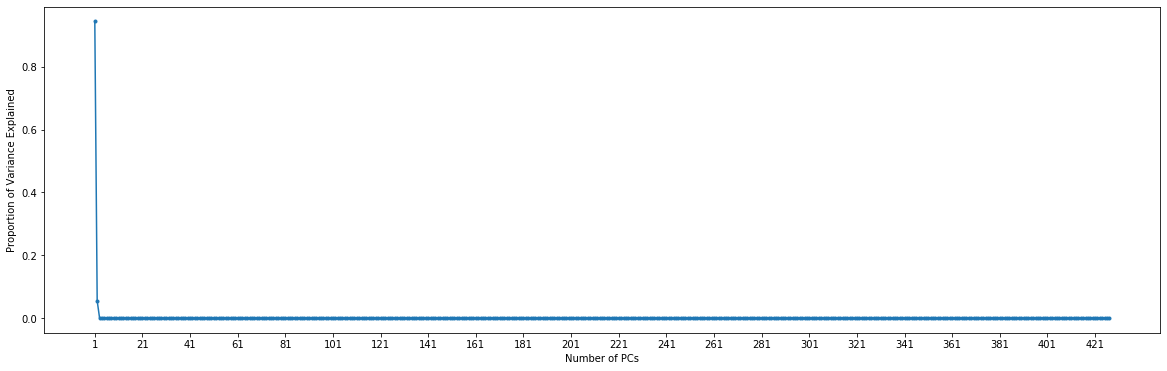

In [410]:
plt.figure(figsize = (20,6))
plt.plot(range(1,428),pca.explained_variance_ratio_,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,427,20))
plt.show()

In [433]:
my_pca = PCA(n_components=0.999999)
my_pca.fit(X_train)

# transform data 
X_train_PCA = my_pca.transform(X_train)
X_test_PCA = my_pca.transform(X_test)

In [434]:
from sklearn.linear_model import LinearRegression

In [435]:
reg = LinearRegression().fit(X_train_PCA, y_train)
reg.score(X_train_PCA, y_train)

0.4633233392597964

In [436]:
reg.score(X_test_PCA, y_test)

0.47233925574759184

In [437]:
from sklearn.metrics import mean_squared_error

In [438]:
y_pred = reg.predict(X_test_PCA)

In [442]:
mean_squared_error(y_test, y_pred, squared = False)

226625.85819569643

In [440]:
y_pred

array([193944.26092688,  69194.33925792,  72174.8396013 , ...,
        16814.80208496, 159302.62429855, 101363.94733863])

In [441]:
y_test

25954       95000.0
4408004     85000.0
1020082     50200.0
3526926     75000.0
1431519     13000.0
             ...   
1051        25000.0
3525017    200000.0
3837329     66500.0
682444      35000.0
31944       50000.0
Name: bond_amount, Length: 40162, dtype: float64

In [445]:
import statsmodels.api as sm

In [446]:
X_withconstant = sm.add_constant(X_train_PCA)
# Instantiate Model
myregression = sm.OLS(y_train,X_train_PCA)

# Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            bond_amount   R-squared (uncentered):                   0.387
Model:                            OLS   Adj. R-squared (uncentered):              0.385
Method:                 Least Squares   F-statistic:                              180.7
Date:                Mon, 21 Sep 2020   Prob (F-statistic):                        0.00
Time:                        02:21:00   Log-Likelihood:                     -1.1361e+06
No. Observations:               81539   AIC:                                  2.273e+06
Df Residuals:                   81255   BIC:                                  2.275e+06
Df Model:                         284                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1698.9462     20.326     83.586      0.000    1659.108    1738.785
x2         -1565.3151     84.637    -18.494      0.000   -1731.204   -1399.427
x3         -4.667e+04   1558.943    -29.938      0.000   -4.97e+04   -4.36e+04
x4          9135.3146   1763.797      5.179      0.000    5678.284    1.26e+04
x5          -347.9288   1981.455     -0.176      0.861   -4231.568    3535.710
x6          4900.7061   2085.085      2.350      0.019     813.955    8987.458
x7          1894.3233   2231.379      0.849      0.396   -2479.164    6267.810
x8         -5.364e+04   2652.881    -20.220      0.000   -5.88e+04   -4.84e+04
x9          3.593e+04   2849.254     12.611      0.000    3.03e+04    4.15e+04
x10        -7.593e+04   4068.408    -18.663      0.000   -8.39e+04    -6.8e+04
x11         1.922e+05   4155.500     46.262      0.000    1.84e+05       2e+05
x12         -3.08e+04   4585.314     -6.718      0.000   -3.98e+04   -2.18e+04
x13        -5.355e+04   4822.521    -11.104      0.000    -6.3e+04   -4.41e+04
x14         4.297e+05   5250.689     81.841      0.000    4.19e+05     4.4e+05
x15         9.244e+04   5390.707     17.147      0.000    8.19e+04    1.03e+05
x16         9.194e+04   5633.619     16.319      0.000    8.09e+04    1.03e+05
x17        -1.877e+04   5763.547     -3.256      0.001   -3.01e+04   -7470.837
x18        -3.805e+05   6015.229    -63.254      0.000   -3.92e+05   -3.69e+05
x19        -5.741e+05   6162.485    -93.152      0.000   -5.86e+05   -5.62e+05
x20         1.225e+04   6486.401      1.889      0.059    -459.516     2.5e+04
x21         -1.74e+05   6573.991    -26.468      0.000   -1.87e+05   -1.61e+05
x22         1.305e+05   6697.126     19.483      0.000    1.17e+05    1.44e+05
x23         1.677e+04   6784.780      2.471      0.013    3467.700    3.01e+04
x24        -3.875e+04   6835.680     -5.669      0.000   -5.22e+04   -2.54e+04
x25         1.062e+05   6926.044     15.336      0.000    9.26e+04     1.2e+05
x26        -3.859e+04   7130.874     -5.412      0.000   -5.26e+04   -2.46e+04
x27        -2.494e+05   7321.745    -34.066      0.000   -2.64e+05   -2.35e+05
x28        -2.045e+05   7416.030    -27.571      0.000   -2.19e+05    -1.9e+05
x29         -2.53e+05   7544.178    -33.539      0.000   -2.68e+05   -2.38e+05
x30        -3.394e+05   7756.363    -43.764      0.000   -3.55e+05   -3.24e+05
x31        -1.243e+05   7833.719    -15.868      0.000    -1.4e+05   -1.09e+05
x32        -2.622e+04   8017.399     -3.270      0.001   -4.19e+04   -1.05e+04
x33         1.038e+04   8253.332      1.258      0.209   -5796.191    2.66e+04
x34         4748.5879   8561.809      0.555      0.579    -1.2e+04    2.15e+04
x35        -1.296e+05   8658.890    -14.969      0.000   -1.4

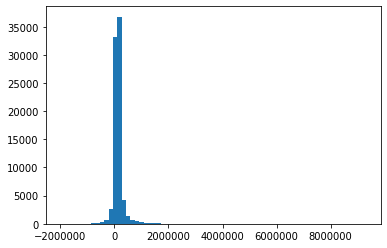

In [449]:
model_resids = myregression_results.resid
plt.figure()
plt.hist(model_resids,bins = 70)
plt.show()

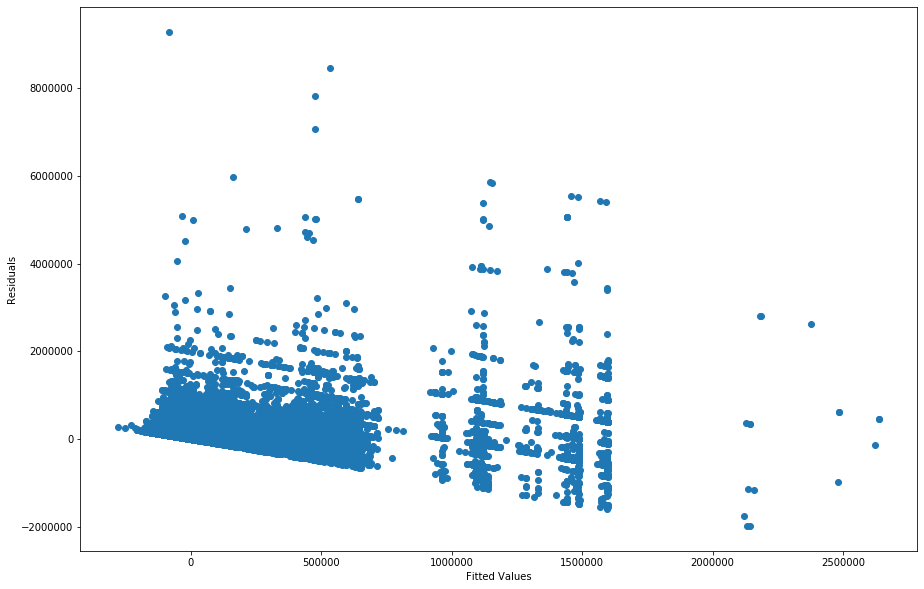

In [448]:
model_fittedvals = myregression_results.fittedvalues 
plt.figure(figsize = (15,10))
plt.scatter(model_fittedvals,model_resids)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()